In [4]:
# Import of necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, minmax_scale
import seaborn as sns


In [ ]:
# Step 1: Data Preparation
# Load the dataset
Algerian_Forest_data=r'/content/Algerian_forest_fires_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(Algerian_Forest_data)
df

In [ ]:
# Data cleaning
# Checking For Missing Values

df.isnull().sum()


In [ ]:
#Summarizing the dataset
df.info()

In [ ]:
#Creating a new dataframe by dropping following columns
forest_fires_data = df.drop(['day', 'month', 'year', 'Classes'],axis=1)
forest_fires_data

In [ ]:
#to gain insights of distribution and spread of the data
forest_fires_data.describe()

In [ ]:
#generating a visual representation of the correlation heatmap
plt.figure(figsize=(12, 10))
corrltn_matrix = forest_fires_data.corr()
sns.heatmap(corrltn_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Structure Among Variables')
plt.show()

In [ ]:
#creating a boxplot
sns.boxplot(forest_fires_data)

In [ ]:
# In order to handle outliers, calcualting Q1, Q3 and IQR
Q1 = forest_fires_data.quantile(0.25)
Q3 = forest_fires_data.quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold for outliers
threshold = 1

# Filtering the outliers
forest_fires_data = forest_fires_data[~((forest_fires_data < (Q1 - threshold * IQR)) | (forest_fires_data > (Q3 + threshold * IQR))).any(axis=1)]
#Number of records remaining after eliminating the outliers
print(f"DataFrame after the removal of outliers shape: {forest_fires_data.shape}")

In [ ]:
#Boxplot after removing outliers

sns.boxplot(forest_fires_data)

In [22]:
#Defining indipendent and dependent variables
x=forest_fires_data.drop(columns=['FWI'])
y=forest_fires_data['FWI']


In [23]:
#Splitting data into 80/20 train/test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

In [24]:
#Scaling data
scalerfn = StandardScaler()
x_train_scaled = scalerfn.fit_transform(x_train)
x_test_scaled = scalerfn.transform(x_test)

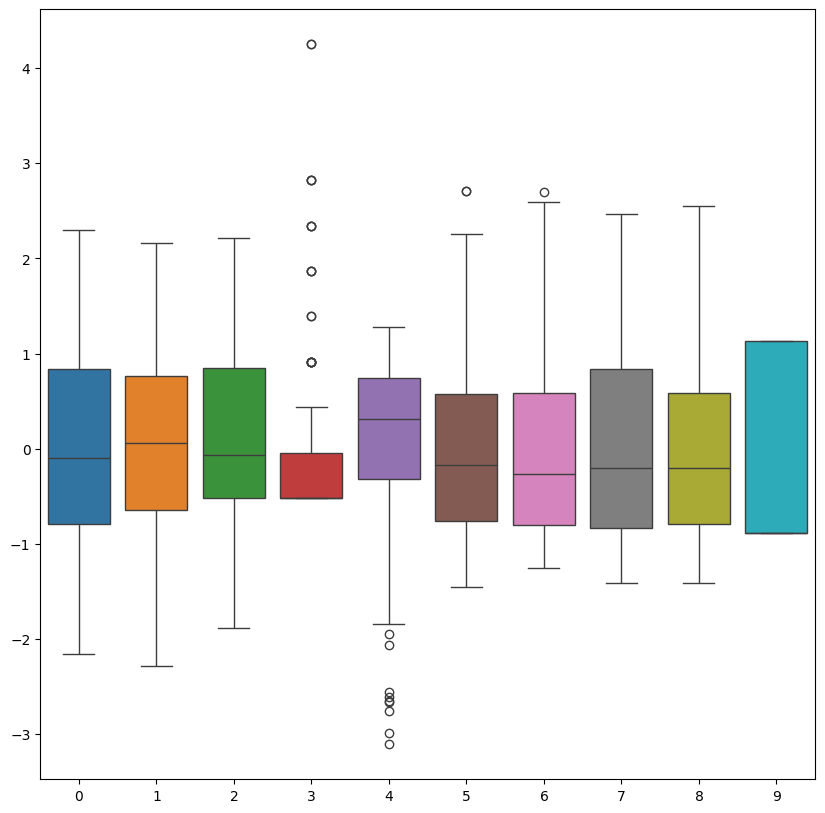

In [25]:
#outliers representation
plt.figure(figsize=(10,10))
sns.boxplot(data=x_train_scaled)
plt.show()

In [26]:
#fitting of model

lr=LinearRegression()

#Taking the data after scaling
lr.fit(x_train_scaled, y_train)



LinearRegression()

In [27]:
lr.coef_, lr.intercept_

(array([ 0.12720661,  0.15506497, -0.06069415, -0.02026187, -0.64937266,
        -0.48282113, -0.39213544,  4.14695328,  2.68045559, -0.06487442]),
 6.24406779661017)

In [28]:
y_pred = lr.predict(x_test_scaled)

In [29]:
#Finding MSE,MAE and r2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Model MSE : ", mse)
print(" Model MAE : ", mae)
print(" Model R2 : ", r2)

 Model MSE :  0.17664682903883341
 Model MAE :  0.2909848658246832
 Model R2 :  0.9912146309877107


In [30]:
# calculate adjusted r2

r2_adj = 1 - ((1-r2)*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1)
r2_adj

0.98659075256019

In [32]:
#Import pickle
import pickle

#Dumping the model objective into pickle file.
with open('linear_regression_model.pkl', 'wb') as file1:
    pickle.dump(lr, file1)
with open('scaler_model.pkl', 'wb') as file2:
    pickle.dump(scalerfn, file2)

In [33]:
#Read the pickle file

with open('linear_regression_model.pkl', 'rb') as file1:
    loadfilemodel = pickle.load(file1)
with open('scaler_model.pkl', 'rb') as file2:
    loadfilescalar = pickle.load(file2)


In [34]:
#prediction on unseen data

newdata_x = [[30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1],
[28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,1],
[27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,1],
[24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,1],
[24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,1]]

newdata_Y = [6.5,0.1,0.2,0.7,0.0]

In [35]:
scaleddata_x = loadfilescalar.transform(newdata_x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
#Predicting for unwanted data
predictY = loadfilemodel.predict(scaleddata_x)
MSE = mean_squared_error(newdata_Y,predictY)
MAE = mean_absolute_error(newdata_Y,predictY)
RSQ = r2_score(newdata_Y,predictY)
print("MSE : ", MSE)
print("MAE : ", MAE)
print("R2 : ", RSQ)

MSE :  0.40526590715812694
MAE :  0.4952457247640659
R2 :  0.9357536608817174
